In [1]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense



In [2]:
#read csv
df=pd.read_csv("Historical_Data/AMAZON.csv")
df.head()

,id,Date,Close,Volume,Open,High,Low
0,3,2021-06-28,3443.89,2242793,3416.00,3448.00,3413.51
1,3,2021-06-25,3401.46,3940997,3464.00,3464.82,3394.18
2,3,2021-06-24,3449.08,3831999,3507.64,3524.86,3430.85
3,3,2021-06-23,3503.82,2813341,3505.00,3521.00,3483.20
4,3,2021-06-22,3505.44,3345082,3458.06,3523.78,3456.09


In [3]:
#Indexing by date

df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']



In [4]:
df['Close']

Date
2021-06-28    3443.89
2021-06-25    3401.46
2021-06-24    3449.08
2021-06-23    3503.82
2021-06-22    3505.44
               ...   
2020-07-06    3057.04
2020-07-02    2890.30
2020-07-01    2878.70
2020-06-30    2758.82
2020-06-29    2680.38
Name: Close, Length: 252, dtype: float64

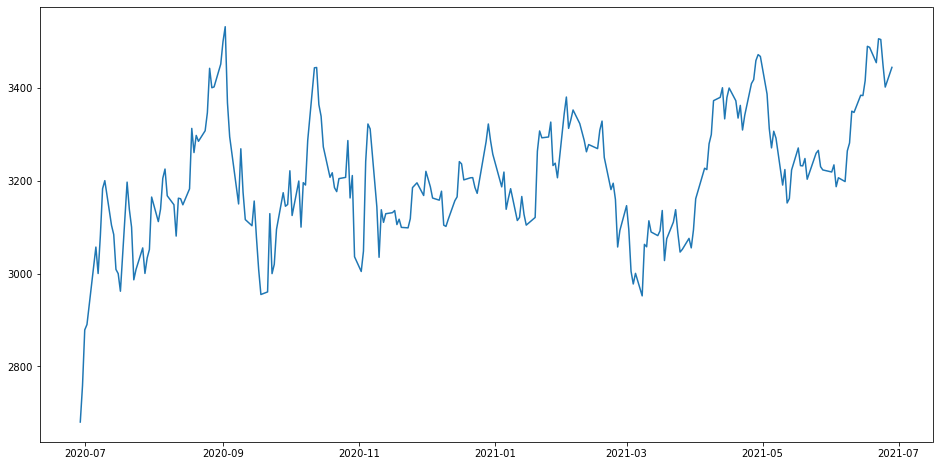

In [5]:
#Plot
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [6]:
#For loop plotting Closing Prices
#for tick in range(1,11):
    #temp_df = df.loc[df['stock_id']==tick]
    #plt.figure(figsize=(16,8))
    #plt.plot(temp_df["close"],label='Close Price history')
    #plt.title(f"Ticker {tick}")


In [7]:
#sort data
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [8]:
new_dataset

,Date,Close
0,2020-06-29 00:00:00,2680.38
1,2020-06-30 00:00:00,2758.82
2,2020-07-01 00:00:00,2878.7
3,2020-07-02 00:00:00,2890.3
4,2020-07-06 00:00:00,3057.04
...,...,...
247,2021-06-22 00:00:00,3505.44
248,2021-06-23 00:00:00,3503.82
249,2021-06-24 00:00:00,3449.08
250,2021-06-25 00:00:00,3401.46


In [9]:
#Normalize
new_dataset.index=new_dataset.Date
new_dataset.drop('Date',axis=1,inplace=True)


In [11]:
final_dataset=new_dataset.values

train_data=final_dataset[:252,:]
valid_data=final_dataset[252:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [12]:
#Build and train the LSTM model:

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


192/192 - 68s - loss: 0.0242


In [13]:
#test stock price predictions using the LSTM model
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)


IndexError: tuple index out of range

In [ ]:
#Save the LSTM model
lstm_model.save("saved_lstm_model.h5")

In [ ]:
train_data=new_dataset[:252,:]
valid_data=new_dataset[252:,:]


In [ ]:
#Visualize the predicted stock costs with actual stock costs:
valid_data['predictions']= closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])